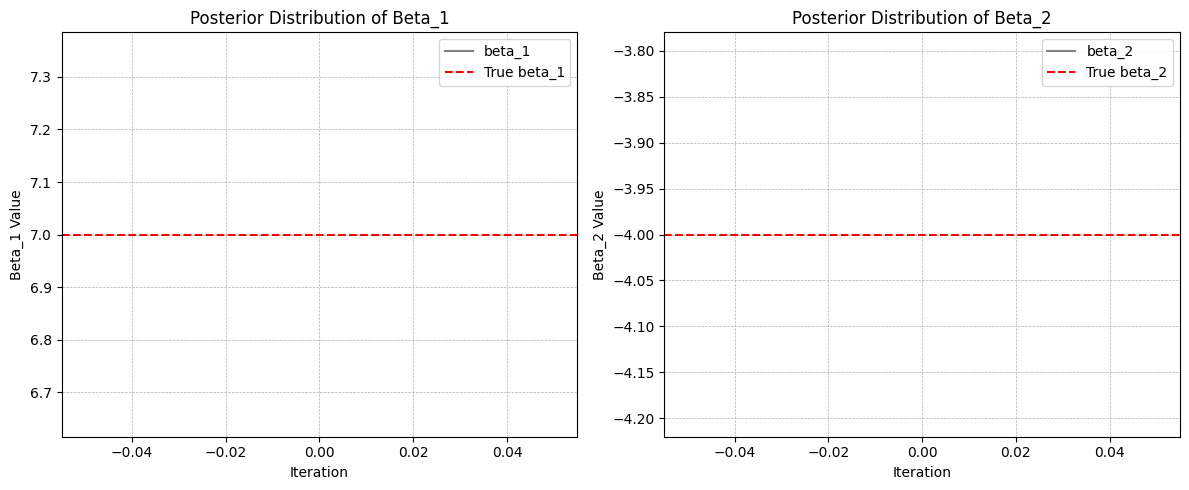

True beta: [ 4  7 -4]
MPE beta: [nan nan nan]


/tmp/ipykernel_903012/332722476.py:32: RuntimeWarning: Mean of empty slice.
  beta_mpe = beta_samples[burn_in:].mean(axis=0)
/home/ohta/dev/bayesian_statistics/.venv/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


def visualize_beta_posterior(beta_samples, beta_true):
    # ベータの事後分布のプロット
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(beta_samples[:, 1], c="grey", label="beta_1")
    plt.axhline(y=beta_true[1], color="r", linestyle="--", label="True beta_1")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.legend()
    plt.title("Posterior Distribution of Beta_1")
    plt.xlabel("Iteration")
    plt.ylabel("Beta_1 Value")

    plt.subplot(1, 2, 2)
    plt.plot(beta_samples[:, 2], c="grey", label="beta_2")
    plt.axhline(y=beta_true[2], color="r", linestyle="--", label="True beta_2")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.legend()
    plt.title("Posterior Distribution of Beta_2")
    plt.xlabel("Iteration")
    plt.ylabel("Beta_2 Value")

    plt.tight_layout()
    plt.show()

    # MPE betaの計算
    burn_in = min(
        15, len(beta_samples) // 2
    )  # burn-in期間を15かサンプル数の半分のいずれか小さい方に設定
    beta_mpe = beta_samples[burn_in:].mean(axis=0)
    print(f"True beta: {beta_true}")
    print(f"MPE beta: {beta_mpe}")


# 使用例
file_path = "../output/beta_samples.h5"

# ファイルを開く際にロックを回避するオプションを使用
with h5py.File(file_path, "r", libver="latest", swmr=True) as f:
    beta_samples = f["beta_samples"][:]

# beta_samplesのうち、まだ0のままになっている部分は削除
beta_samples = beta_samples[beta_samples[:, 0] != 0]

beta_true = np.array([4, 7, -4])  # 真のベータ値

try:
    visualize_beta_posterior(beta_samples, beta_true)
except Exception as e:
    print(f"エラーが発生しました: {e}")
    print(
        "ファイルにアクセスできない可能性があります。サンプリングプロセスが完了するまで待つか、プロセスを終了してください。"
    )

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

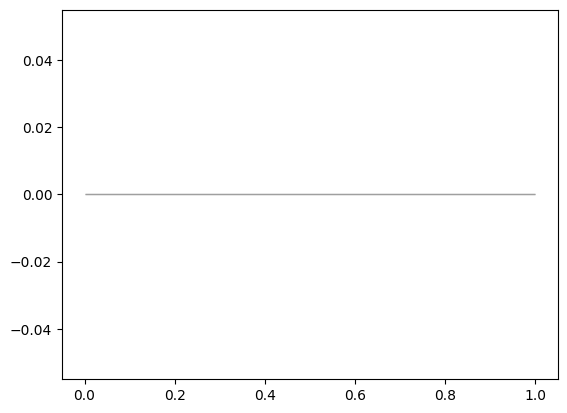

In [3]:
plt.hist(beta_samples[500000:, 1], bins=1000, color="gray", edgecolor="gray")